# Classification of similar vertical structures in Indian Ocean [IO] Region

## Importing Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
# import netCDF4 as nc

import matplotlib.pyplot as plt
import cartopy.feature as cfeature 
# import seaborn as sns
import cartopy.crs as ccrs
import cmocean

# import argopy
import pyxpcm
from pyxpcm.models import pcm

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [2]:
# %matplotlib inline

In [3]:
ds98 =xr.open_dataset("/home/cccr/shikha/MAYUR/Project/Data/updated4_30_120_30S_30N_0_1000_2010-01-01_2019-12-31_erddap.nc")

In [4]:
ds99=ds98

In [5]:
ds=ds99

In [6]:
ds

<xarray.Dataset>
Dimensions:                (N_LEVELS: 201, N_PROF: 120272)
Coordinates:
  * N_LEVELS               (N_LEVELS) int64 0 -5 -10 -15 ... -990 -995 -1000
    LATITUDE               (N_PROF) float64 ...
    LONGITUDE              (N_PROF) float64 ...
    TIME                   (N_PROF) datetime64[ns] ...
    N_PROF_                (N_PROF) int64 ...
Dimensions without coordinates: N_PROF
Data variables:
    CONFIG_MISSION_NUMBER  (N_PROF) int64 ...
    CYCLE_NUMBER           (N_PROF) int64 ...
    PLATFORM_NUMBER        (N_PROF) int64 ...
    POSITION_QC            (N_PROF) int64 ...
    PRES                   (N_PROF, N_LEVELS) float32 ...
    PRES_QC                (N_PROF) int64 ...
    PSAL                   (N_PROF, N_LEVELS) float32 ...
    PSAL_QC                (N_PROF, N_LEVELS) int64 ...
    TEMP                   (N_PROF, N_LEVELS) float32 ...
    TEMP_QC                (N_PROF, N_LEVELS) int64 ...
    TIME_QC                (N_PROF) int64 ...
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         https://www.ifremer.fr/erddap
    Fetched_by:           shikha
    Fetched_date:         2021/04/04
    Fetched_constraints:  [x=30.00/120.00; y=-30.00/30.00; z=0.0/1000.0; t=20...
    Fetched_uri:          ['https://www.ifremer.fr/erddap/tabledap/ArgoFloats...
    history:              Variables filtered according to DATA_MODE; Variable...

## Stats of Data

### Bar Plot of Argo Data from 2010 to 2019

In [7]:
ds_time_year=ds.TIME.dt.year.values

ds_year_count=[]

for i in range(0,10):
    ds_year_count.append(ds_time_year.tolist().count(2010+i))
    
ds_year_count

[8764, 9882, 11286, 11722, 11148, 13819, 14458, 16091, 11379, 11723]

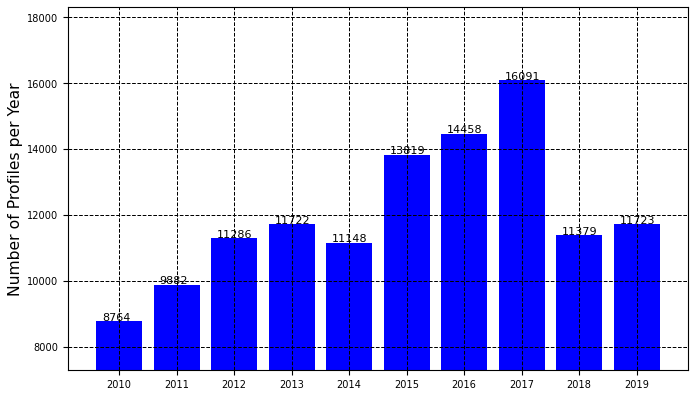

In [8]:
import math

## Decadal Sampling of Argo floats
import matplotlib.pyplot as plt
# from matplotlib.pyplot import plt
plt.figure(figsize=(10, 6), dpi=80)

x2 = np.arange(10)
y2 = [8764, 9882, 11286, 11722, 11148, 13819, 14458, 16091, 11379, 11723]

width = 0.8
  
# plot data in grouped manner of bar type
plt.bar(x2, y2, width, color='blue',align='center')


plt.xticks(x2, ['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019'])
label2 = ['8764', '9882', '11286', '11722', '11148', '13819', '14458', '16091', '11379', '11723']

for i in range(0,10):
    plt.text(x = x2[i]-0.3 , y = y2[i]+30, s = label2[i], size = 10)

    
# plt.xticks(x, ['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019'])
plt.ylabel("Number of Profiles per Year",fontsize=14)
plt.grid(color = 'black', linestyle = 'dashed', linewidth = 0.9)


# "Y min and max"
low = min(y2)
high = max(y2)
plt.ylim([math.ceil(low-0.2*(high-low)), math.ceil(high+0.3*(high-low))])

# plt.savefig("/home/cccr/shikha/MAYUR/Project/Results/Number of Profiles per Year.jpg",dpi=300)

plt.show()

In [9]:
### Plotting Monthly Data

ds_time_month=ds.TIME.dt.month.values

ds_month_count=[]
    

for i in range(0,12):
    ds_month_count.append(ds_time_month.tolist().count(1+i))
    
ds_month_count

[10538, 9466, 10220, 9899, 10335, 9731, 10152, 9995, 9746, 10167, 9942, 10081]

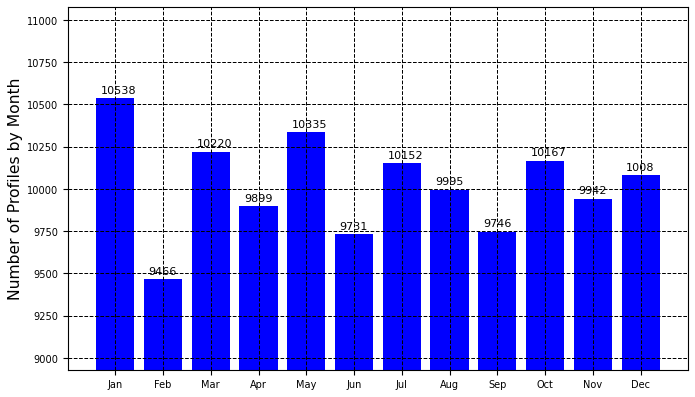

In [10]:
## Plotting Seasonal Sampling of Argo floats

from matplotlib.pyplot import figure
figure(figsize=(10, 6), dpi=80)

x = np.arange(12)
y1 = [10538,9466,10220,9899,10335,9731,10152,9995,9746,10167,9942,10081]

width = 0.8
  
# plot data in grouped manner of bar type
plt.bar(x, y1, width, color='blue',align='center')


plt.xticks(x, ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

label = ['10538','9466','10220','9899','10335','9731','10152','9995','9746','10167','9942','1008']

for i in range(0,12):
    plt.text(x = x[i]-0.3 , y = y1[i]+30, s = label[i], size = 10)



# plt.xticks(x, ['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019'])
plt.ylabel("Number of Profiles by Month", fontsize=14)
plt.grid(color = 'black', linestyle = 'dashed', linewidth = 0.9)
low = min(y1)
high = max(y1)
plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])

# for i in range(len(y1)):
#     plt.annotate(x[i], (-0.1 + i, x[i] + j))

# plt.legend(["Round 1", "Round 2", "Round 3"])

# plt.savefig("/home/cccr/shikha/MAYUR/Project/Results/Number of Profiles by Month.jpg",dpi=300)

plt.show()

### Flots intensity plots

In [11]:
ss=pd.DataFrame({'TIME':ds['TIME'].values,'LAT':ds['LATITUDE'].values,'LONG':ds['LONGITUDE'].values})
ss['Count']=1
ss.sort_values(by='LAT').sort_values(by='LONG')


##************************************************************************************************
z = np.arange(0,-1010,-10.0)
pcm_features = {'temperature': z, 'salinity':z}
m = pcm(K=8, features=pcm_features,maxvar=8)

In [12]:
vv=[]
x_range=range(-30,31,10)
y_range=range(30,121,10)
for x in range(len(x_range)-1):
    for y in range(len(y_range)-1):
#         print(x_range[x],x_range[x+1],y_range[y],y_range[y+1])
#         vv.append(ss[((ss['LAT'].between(x_range[x],x_range[x+1]))&(ss['LONG'].between(y_range[y],y_range[y+1])))].count()[0])
#         print(x_range[x],x_range[x+1],y_range[y],y_range[y+1])
        df_temp=ss[((ss['LAT'].between(x_range[x],x_range[x+1]))&
                    ss['LONG'].between(y_range[y],y_range[y+1]))]

        cnt=ss[((ss['LAT'].between(x_range[x],x_range[x+1]))&
                ss['LONG'].between(y_range[y],y_range[y+1]))].count()[0]

        df_temp['Count']=cnt
        vv.extend(df_temp.values)

<ipython-input-12-2a1085c94456>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['Count']=cnt


In [13]:
f_data=pd.DataFrame(vv)
f_data.columns=ss.columns
# f_data

/home/cccr/shikha/anaconda3/envs/menv/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/cccr/shikha/anaconda3/envs/menv/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


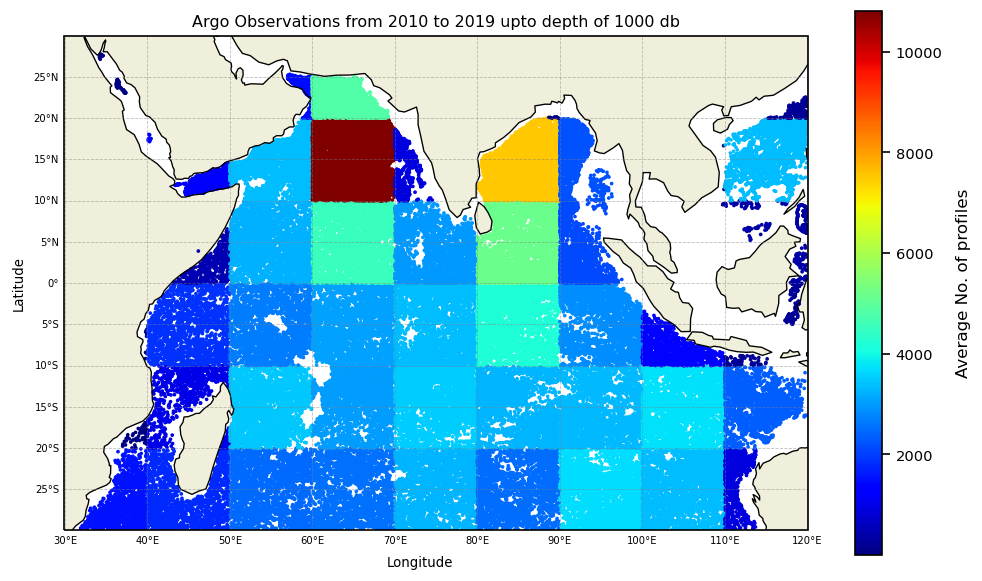

In [14]:
proj = ccrs.PlateCarree()
subplot_kw={'projection': proj, 'extent': np.array([30,120,-22,22]) + np.array([-0.1,+0.1,-0.1,+0.1])}
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6), dpi=120, subplot_kw=subplot_kw)

# kmap = m.plot.cmap()
# sc = ax.scatter(ds['LONGITUDE'], ds['LATITUDE'], s=0.5, transform=proj)
# sc = plt.scatter(f_data['LONG'], f_data['LAT'], c=f_data['Count'], vmin=f_data['Count'].min(), vmax=f_data['Count'].max(), cmap='rainbow')
# sc = plt.scatter(f_data['LONG'], f_data['LAT'], c=f_data['Count'],  cmap='rainbow')
sc = plt.scatter(f_data['LONG'], f_data['LAT'], c=f_data['Count'],s=2,cmap='jet')
# cl = m.plot.colorbar(ax=ax)
cl=plt.colorbar(sc,label='Average No. of profiles')
gl =m.plot.latlongrid(ax, dx=10)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)

label = cl.ax.set_xlabel('Longitude', fontsize = 8)
cl.ax.xaxis.set_label_coords(-16,0)

label1 = cl.ax.set_ylabel('Latitude', fontsize = 8)
cl.ax.yaxis.set_label_coords(-31,0.5)

ax.text(138,-11,'Average No. of profiles',size=10,rotation='vertical')

ax.set_title('Argo Observations from 2010 to 2019 upto depth of 1000 db')

# plt.savefig("/home/cccr/shikha/MAYUR/Project/Results/Argo Observations from 2010 to 2019 upto depth of 1000 db.jpg")

plt.show()

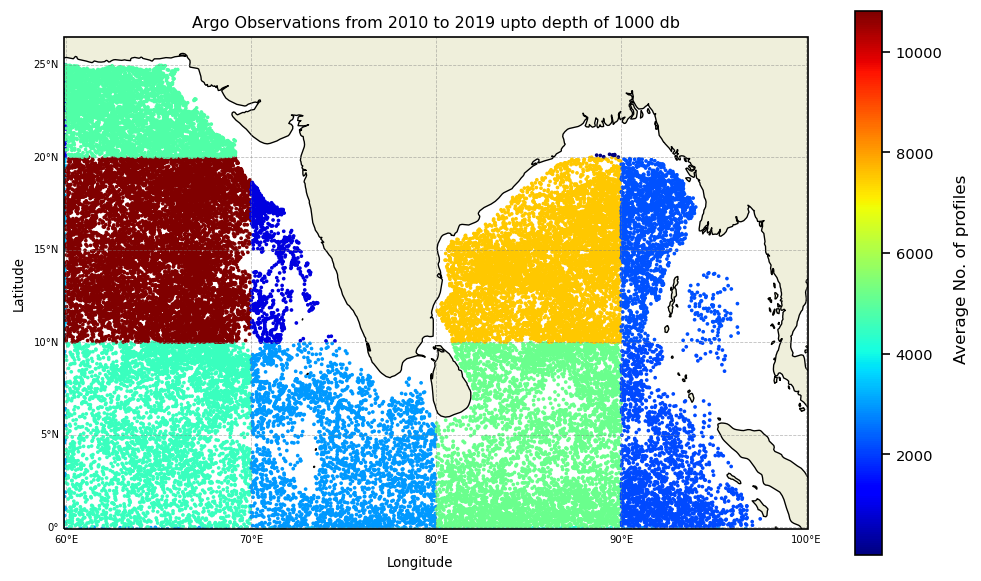

In [15]:
proj = ccrs.PlateCarree()
subplot_kw={'projection': proj, 'extent': np.array([60,100,0,25]) + np.array([-0.1,+0.1,-0.1,+0.1])}
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6), dpi=120, facecolor='w', edgecolor='k', subplot_kw=subplot_kw)

# kmap = m.plot.cmap()
# sc = ax.scatter(ds['LONGITUDE'], ds['LATITUDE'], s=0.5, transform=proj)
# sc = plt.scatter(f_data['LONG'], f_data['LAT'], c=f_data['Count'], vmin=f_data['Count'].min(), vmax=f_data['Count'].max(), cmap='rainbow')
# sc = plt.scatter(f_data['LONG'], f_data['LAT'], c=f_data['Count'],  cmap='rainbow')
sc = plt.scatter(f_data['LONG'], f_data['LAT'], c=f_data['Count'],s=2,cmap='jet')
# cl = m.plot.colorbar(ax=ax)
cl=plt.colorbar(sc,label='Average No. of profiles')
gl = m.plot.latlongrid(ax, dx=10)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
# ax.add_feature(cfeature.RIVERS)
# ax.gridlines()
ax.set_title('Argo Observations from 2010 to 2019 upto depth of 1000 db')

label = cl.ax.set_xlabel('Longitude', fontsize = 8)
cl.ax.xaxis.set_label_coords(-16,0)

label1 = cl.ax.set_ylabel('Latitude', fontsize = 8)
cl.ax.yaxis.set_label_coords(-31,0.5)

# ax.text(0, 0, 'hello world', size=5, rotation='vertical')
ax.text(108,9,'Average No. of profiles',size=10,rotation='vertical')

# plt.savefig("/home/cccr/shikha/MAYUR/Project/Results/Observations since 2010 to 2019 in IO.jpg")
plt.show()